**Part-1**<br/>
Problem: Develop a sound classification model using deep learning<br/>
Dataset: ESC 5 (source: https://drive.google.com/drive/folders/1CY2FD3RTqfochW3vRO9zsBED825lP_AM?usp=sharing)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wave
import soundfile as sf
import os
import glob
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import load_model

In [ ]:
# visualization of a sound file
def visualize_wav(oggfile):
    data, samplerate = sf.read(oggfile)
    if not os.path.exists('sample_wav'):
        os.mkdir('sample_wav')
    sf.write('sample_wav/new_file.wav', data, samplerate)
    spf = wave.open('sample_wav/new_file.wav')
    signal = spf.readframes(-1)
    signal = np.fromstring(signal,'Int16')
    if spf.getnchannels() == 2:
        print('just mono files. not stereo')
        sys.exit(0)
    # plotting x axis in seconds. create time vector spaced linearly     with size of audio file. divide size of signal by frame rate to get   stop limit
    Time = np.linspace(0,len(signal)/samplerate, num = len(signal))
    plt.figure(1)
    plt.title('Signal Wave Vs Time(in sec)')
    plt.plot(Time, signal)
    plt.savefig('sample_wav/sample_waveplot_Fire.png', bbox_inches='tight')
    plt.show()

# define path to a sound file
file_path= '/content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/1-100032-A.ogg'
# pass to the visualization function
visualize_wav(file_path)

RuntimeError: ignored

**Note:** Mel-frequency Cepstrum Coefficient (MFCC) features are very useful for sound classification. Read about MFCC here http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#:~:text=Mel%20Frequency%20Cepstral%20Coefficents%20%28MFCCs%29%20are%20a%20feature,the%201980%27s%2C%20and%20have%20been%20state-of-the-art%20ever%20since.

In [ ]:
# get mfcc features from a sound file
def get_features(file_name):
    if file_name: 
        X, sample_rate = sf.read(file_name, dtype='float32')
    # mfcc (mel-frequency cepstrum)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    return mfccs_scaled
get_features('/content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/1-100032-A.ogg')

array([-5.81740051e+02,  8.20662498e+00, -6.65886688e+00, -4.29141283e+00,
       -3.03464222e+00,  2.59199560e-01, -1.96439826e+00, -2.71644920e-01,
        5.18168926e-01,  3.41996104e-01,  9.05891299e-01, -9.25950054e-03,
       -1.90380082e-01, -1.32399216e-01, -6.07577562e-01, -7.11830929e-02,
        2.63757467e-01,  2.52475254e-02, -2.88022518e-01, -8.00251007e-01,
       -3.57701689e-01, -1.31888390e-01,  1.15226261e-01,  2.61700630e-01,
       -3.45187545e-01, -6.40225768e-01,  1.31810471e-01,  2.66713738e-01,
       -4.32194531e-01, -1.38755813e-01, -1.56607702e-01, -1.92929506e-01,
        4.54157852e-02,  1.35186523e-01, -3.72342080e-01, -1.90443709e-01,
       -3.42137702e-02,  4.62208331e-01,  3.65841873e-02,  1.06212296e-01],
      dtype=float32)

In [ ]:
sub_dirs = os.listdir('/content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5')
sub_dirs.sort()

FileNotFoundError: ignored

Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/4-182395-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/3-155312-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/3-136288-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/2-117271-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/3-144028-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/3-157695-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/2-118072-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Health/week 4/dataset-ESC5/001 - Dog bark/2-118964-A.ogg
Extracting file  /content/drive/MyDrive/Omdena Course/Smart Heal

In [ ]:
def get_numpy_array(features_df):
    X = np.array(features_df.feature.tolist())
    y = np.array(features_df.class_label.tolist())
    # encode classification labels
    le = LabelEncoder()
    # one hot encoded labels
    yy = to_categorical(le.fit_transform(y))
    return X,yy,le

def get_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    return  X_train, X_test, y_train, y_test

def create_mlp(num_labels):
    model = Sequential()
    model.add(Dense(256,input_shape = (40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,input_shape = (40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    return model

  def train(model,X_train, X_test, y_train, y_test,model_file):    
      # compile the model 
      model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
      print(model.summary())
      print("training for 100 epochs with batch size 32")
      model.fit(X_train,y_train,batch_size= 32, epochs = 100, validation_data=(X_test,y_test))
      # save model to disk
      print("Saving model to disk")
      model.save(model_file)

def compute(X_test,y_test,model_file):
    # load model from disk
    loaded_model = load_model(model_file)
    score = loaded_model.evaluate(X_test,y_test)
    return score[0],score[1]*100



In [ ]:
#convert into numpy array
X, y, le = get_numpy_array(features_df)

# split into training and testing data
X_train, X_test, y_train, y_test = get_train_test(X,y)
num_labels = y.shape[1]

# create model architecture
model = create_mlp(num_labels)

# train model
print("Training..")
train(model,X_train, X_test, y_train, y_test,"trained_mlp.h5")

# compute test loss and accuracy
test_loss, test_accuracy = compute(X_test,y_test,"trained_mlp.h5")
print("Test loss",test_loss)
print("Test accuracy",test_accuracy)

Training..
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               10496     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)     

Food for thought: why the accuracy is low? How to improve?

**Part-2**<br/>
Develop & deploy a biomedical image classification model<br/>
Useful Packages<br/>

1.   Scikit-image https://scikit-image.org
2.   Imageio https://pypi.org/project/imageio/
3.   Open CV https://pypi.org/project/opencv-python/ <br/>

Follow class instructions for model development and exporting




original: (359, 638)
(3, 3)
output: (361, 361)


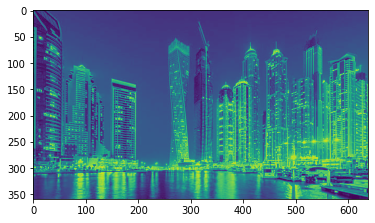

In [ ]:
# ref: Samrat Sahoo, UT arlington
import sys

import cv2
import numpy as np
import matplotlib.pyplot as plt


# Grayscale Image
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image


def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))
    print(kernel.shape)

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    print('output:',output.shape)

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/MyDrive/Omdena Course/Smart Health/week 4/Image.jpeg')
    print('original:',image.shape)
    plt.imshow(image)

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('<IMAGE_PATH>')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)
